[This map](https://covid.cdc.gov/covid-data-tracker/index.html#county-map) is bad. Let's improve it.

## Data Prep

First we, need to find the data. Clicking USAFacts.org link below the map takes me [here](https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/). There's already a better map there but a) it's an unclassified choropleth and b) I want to make my own. 

Look, there's some links to download data:
- [Known Cases](https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_confirmed_usafacts.csv)  ([cache](https://raw.githubusercontent.com/jamesdamillington/usa-covid-mapping/main/data/covid_confirmed_usafacts_2020-10-27.csv) of data on 2020-10-27)
- [County Populations](https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_county_population_usafacts.csv) ([cache](https://raw.githubusercontent.com/jamesdamillington/usa-covid-mapping/main/data/covid_county_population_usafacts_2020-10-27.csv) of data on 2020-10-27)

Now I need a shapefile to link the county data to. Download a shapefile from [US census website](https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html) - we'll use the most coarse resolution (1:20,000,000) to keep things simple. ([cache](https://github.com/jamesdamillington/usa-covid-mapping/tree/main/data/cb_2019_us_county_20m_2020-10-27) of file on 2020-10-27)

In [1]:
import pandas as pd

In [2]:
cty_cases = pd.read_csv("data/covid_confirmed_usafacts_2020-10-27.csv")
cty_cases.head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,1966,1983,1989,1999,2010,2021,2023,2030,2048,2059
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,6333,6350,6369,6375,6405,6443,6475,6615,6637,6658
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,968,977,981,981,988,996,997,1012,1031,1033
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,771,775,785,789,791,801,811,825,828,840


Note that every state gets a row for data unallocated to a county: 

In [3]:
cty_cases.sort_values(by='countyFIPS').head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1338,0,Statewide Unallocated,MN,27,0,0,0,0,0,0,...,177,215,215,195,195,195,211,201,201,292
1254,0,Statewide Unallocated,MI,26,0,0,0,0,0,0,...,6292,6305,6305,6741,6745,6765,6812,6942,7036,7036
1239,0,Statewide Unallocated,MA,25,0,0,0,0,0,0,...,1071,1086,1101,1116,1129,1139,1139,1139,1157,1157
1214,0,Statewide Unallocated,MD,24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's drop this so that we have county-specific data only:

In [4]:
cty_cases = cty_cases[cty_cases['countyFIPS'] > 1000]
cty_cases.sort_values(by='countyFIPS').head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,1966,1983,1989,1999,2010,2021,2023,2030,2048,2059
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,6333,6350,6369,6375,6405,6443,6475,6615,6637,6658
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,968,977,981,981,988,996,997,1012,1031,1033
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,771,775,785,789,791,801,811,825,828,840
5,1009,Blount County,AL,1,0,0,0,0,0,0,...,1783,1807,1827,1838,1848,1873,1893,1911,1925,1932


Do above for populaiton data

In [5]:
cty_pops = pd.read_csv("data/covid_county_population_usafacts_2020-10-27.csv")
cty_pops = cty_pops[cty_pops['countyFIPS'] > 1000]
cty_pops.sort_values(by='countyFIPS').head()

,countyFIPS,County Name,State,population
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394
5,1009,Blount County,AL,57826


Join these dfs (checking one-to-one merge):

In [6]:
cty_dat = pd.merge(cty_cases,cty_pops, how='left', on='countyFIPS', validate="1:1")

Now the spatial data

In [7]:
import geopandas as gpd

In [8]:
cty_shp = gpd.read_file("data/cb_2019_us_county_20m_2020-10-27/cb_2019_us_county_20m.shp")
cty_shp.sort_values(by="COUNTYFP").head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
1891,48,001,01383786,0500000US48001,48001,Anderson,06,2752201306,39808595,"POLYGON ((-96.05279 32.00589, -95.42851 32.084..."
3055,24,001,01713506,0500000US24001,24001,Allegany,06,1093462025,14801442,"POLYGON ((-79.06689 39.48062, -78.92842 39.723..."
996,06,001,01675839,0500000US06001,06001,Alameda,06,1909614756,216907015,"POLYGON ((-122.33371 37.80980, -122.30393 37.8..."
367,12,001,00308548,0500000US12001,12001,Alachua,06,2267634813,241567998,"POLYGON ((-82.65855 29.83014, -82.64063 29.828..."
2231,51,001,01480091,0500000US51001,51001,Accomack,06,1163708393,2229277504,"POLYGON ((-75.94118 37.56384, -75.89866 37.635..."


No common column with cty_dat df (e.g. countyFIPS) to merge on. Need to combine STATEFP and COUNTYFP to create a common (countyFIPS) column.

As indicated [here](https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html):
> FIPS codes for smaller geographic entities are usually unique within larger geographic entities. For example, FIPS state codes are unique within nation and FIPS county codes are unique within state. Since counties nest within states, a full county FIPS code identifies both the state and the nesting county. For example, there are 49 counties in the 50 states ending in the digits “001”. To make these county FIPS codes unique, the state FIPS codes are added to the front of each county (01001, 02001, 04001, etc), where the first two digits refer to the state the county is in and the last three digits refer specifically to the county.

The head of cty_dat above has 4-digit codes, maybe that's because some states have single digit codes. Look at the tail to check if they are 5-digit:

In [9]:
cty_dat.tail()

,countyFIPS,County Name_x,State_x,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,County Name_y,State_y,population
3139,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,422,428,436,443,451,456,462,Sweetwater County,WY,42343
3140,56039,Teton County,WY,56,0,0,0,0,0,0,...,711,715,715,727,740,743,747,Teton County,WY,23464
3141,56041,Uinta County,WY,56,0,0,0,0,0,0,...,403,404,407,410,425,428,431,Uinta County,WY,20226
3142,56043,Washakie County,WY,56,0,0,0,0,0,0,...,135,139,142,143,144,145,145,Washakie County,WY,7805
3143,56045,Weston County,WY,56,0,0,0,0,0,0,...,99,101,103,115,121,127,127,Weston County,WY,6927


Yep. But we should force countyFIPS in cty_dat to 5-digits to be safe. Quick check what dtype the columns are:

In [10]:
cty_dat.dtypes

countyFIPS        int64
County Name_x    object
State_x          object
stateFIPS         int64
1/22/20           int64
                  ...  
10/24/20          int64
10/25/20          int64
County Name_y    object
State_y          object
population        int64
Length: 285, dtype: object

We have integers, but these will become str after format:

In [11]:
cty_dat['countyFIPS'] = cty_dat['countyFIPS'].apply(lambda x: '{0:0>5}'.format(x))

In [12]:
cty_dat.dtypes

countyFIPS       object
County Name_x    object
State_x          object
stateFIPS         int64
1/22/20           int64
                  ...  
10/24/20          int64
10/25/20          int64
County Name_y    object
State_y          object
population        int64
Length: 285, dtype: object

In [13]:
cty_dat.head()

,countyFIPS,County Name_x,State_x,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,County Name_y,State_y,population
0,01001,Autauga County,AL,1,0,0,0,0,0,0,...,1999,2010,2021,2023,2030,2048,2059,Autauga County,AL,55869
1,01003,Baldwin County,AL,1,0,0,0,0,0,0,...,6375,6405,6443,6475,6615,6637,6658,Baldwin County,AL,223234
2,01005,Barbour County,AL,1,0,0,0,0,0,0,...,981,988,996,997,1012,1031,1033,Barbour County,AL,24686
3,01007,Bibb County,AL,1,0,0,0,0,0,0,...,789,791,801,811,825,828,840,Bibb County,AL,22394
4,01009,Blount County,AL,1,0,0,0,0,0,0,...,1838,1848,1873,1893,1911,1925,1932,Blount County,AL,57826


Now create common column in cty_shp

STATEFP and COUNTYFP in cty_shp are string. So:
- concat STATEFP and COUNTYFP
- pad to 5 digits

In [14]:
cty_shp['countyFIPS'] = cty_shp['STATEFP'] + cty_shp['COUNTYFP']
cty_shp['countyFIPS'] = cty_shp['countyFIPS'].apply(lambda x: '{0:0>5}'.format(x))

In [15]:
cty_shp.sort_values(by='countyFIPS').head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,countyFIPS
679,01,001,00161526,0500000US01001,01001,Autauga,06,1539602137,25706961,"POLYGON ((-86.91759 32.66417, -86.71339 32.661...",01001
1220,01,003,00161527,0500000US01003,01003,Baldwin,06,4117621645,1132980868,"POLYGON ((-88.02632 30.75336, -87.94455 30.827...",01003
2284,01,005,00161528,0500000US01005,01005,Barbour,06,2292160139,50523213,"POLYGON ((-85.73573 31.62449, -85.66565 31.786...",01005
1978,01,007,00161529,0500000US01007,01007,Bibb,06,1612167476,9602089,"POLYGON ((-87.42194 33.00338, -87.31854 33.006...",01007
109,01,009,00161530,0500000US01009,01009,Blount,06,1670103866,15015467,"POLYGON ((-86.96336 33.85822, -86.92439 33.909...",01009


Now we're ready to merge data with shapefile:

In [16]:
cty_all = pd.merge(cty_shp, cty_dat,  how='left', on='countyFIPS')

Let's work with conterminous states only (state codes [here](https://www.census.gov/library/reference/code-lists/ansi.html#par_textimage_3))

In [ ]:
cty_cont = cty_all.dropna()
cty_cont = cty_cont[cty_cont['State_y'] != 'AK']
cty_cont = cty_cont[cty_cont['State_y'] != 'HI']

<AxesSubplot:>

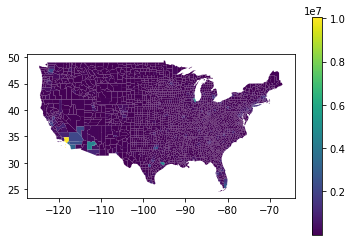

In [32]:
cty_cont.plot('population', legend=True)

<AxesSubplot:>

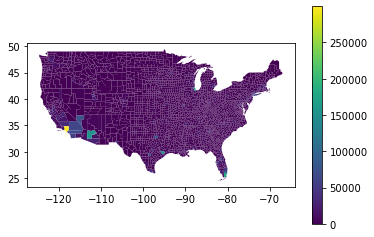

In [33]:
cty_cont.plot('10/25/20', legend=True)

In [29]:
cty_cont['case_rate'] = cty_cont['10/25/20'] / cty_cont['population']

<AxesSubplot:>

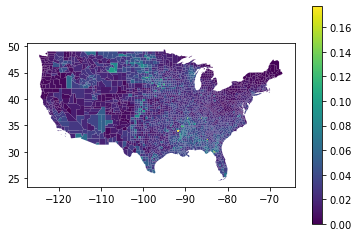

In [31]:
cty_cont.plot('case_rate', legend=True)

In [42]:
cty_cont['case_rate_100k'] = cty_cont['case_rate'] * 100000

<AxesSubplot:>

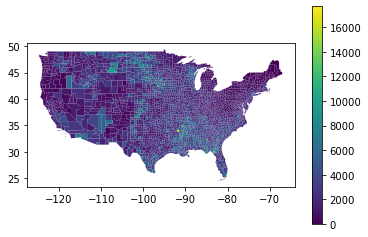

In [43]:
cty_cont.plot('case_rate_100k', legend=True)

## Choropleths

From [Rey _et al._ (2020)](https://geographicdata.science/book/notebooks/05_choropleth.html)
> Different classification schemes obtain from their definition of the class boundaries. The choice of the classification scheme should take into consideration the statistical distribution of the attribute values.

array([[<AxesSubplot:title={'center':'case_rate_100k'}>]], dtype=object)

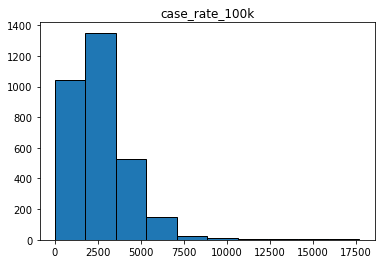

In [45]:
cty_cont.hist('case_rate_100k',
              edgecolor='black',
              grid=False)

In [25]:
import mapclassify
import matplotlib.pyplot as plt

### Equal Interval

In [68]:
equal = mapclassify.EqualInterval(cty_cont['case_rate_100k'], k=5)
equal

EqualInterval               

      Interval         Count
----------------------------
[    0.00,  3541.15] |  2391
( 3541.15,  7082.31] |   674
( 7082.31, 10623.46] |    34
(10623.46, 14164.62] |     5
(14164.62, 17705.77] |     4

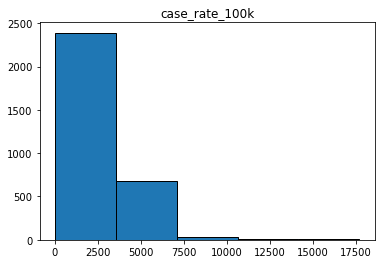

In [79]:
eqbins = [0] + equal.bins.tolist()

cty_cont.hist('case_rate_100k',
              bins=eqbins,
              edgecolor='black',
              grid=False)

plt.show()

<AxesSubplot:>

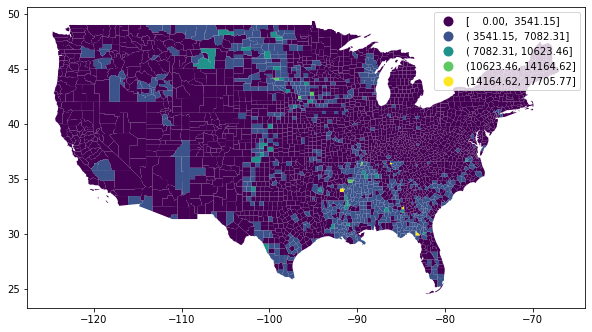

In [97]:
fig, ax = plt.subplots(1, figsize=(10, 8))
cty_cont.plot(column='case_rate_100k', scheme='equal_interval', k=5, ax=ax, legend=True)

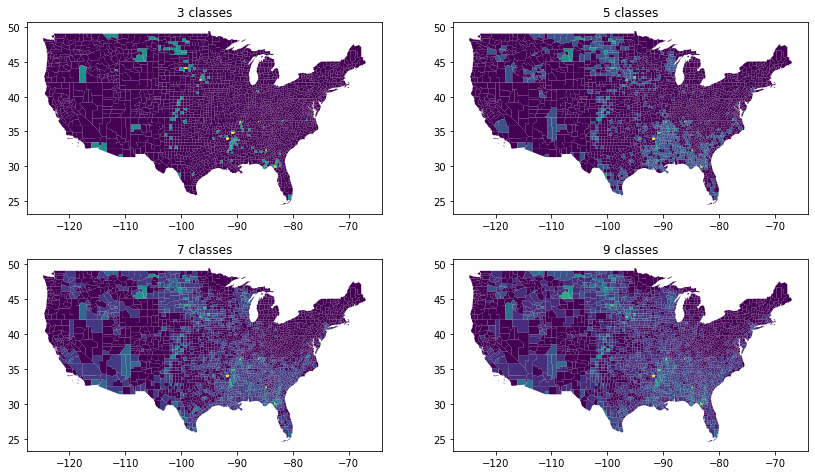

In [111]:
fig, axs = plt.subplots(2,2, figsize=(14, 8))
myaxs = [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]
for idx, val in enumerate([3,5,7,9]):
    cty_cont.plot(column='case_rate_100k', scheme='equal_interval', k=val, ax=myaxs[idx], legend=False)
    myaxs[idx].set_title(str(val) + " classes")
plt.show()

### Quantiles

In [77]:
q5 = mapclassify.Quantiles(cty_cont['case_rate_100k'], k=5)
q5

Quantiles                   

      Interval         Count
----------------------------
[    0.00,  1254.31] |   622
( 1254.31,  1974.91] |   621
( 1974.91,  2711.62] |   622
( 2711.62,  3714.43] |   621
( 3714.43, 17705.77] |   622

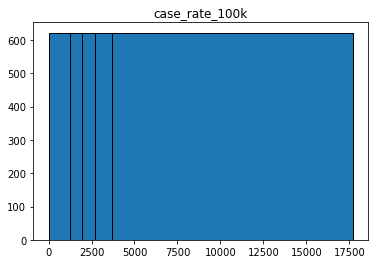

In [81]:
q5bins = [0] + q5.bins.tolist()
cty_cont.hist('case_rate_100k',
              bins=q5bins,
              edgecolor='black',
              grid=False)
plt.show()

<AxesSubplot:>

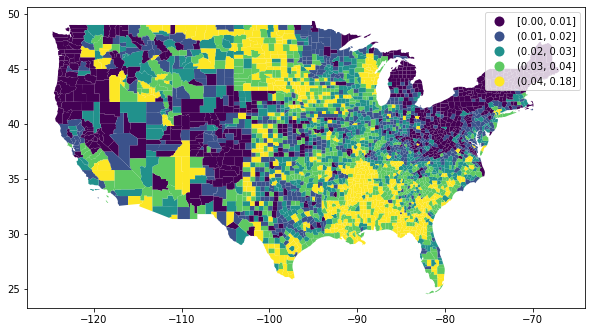

In [38]:
fig, ax = plt.subplots(1, figsize=(10, 8))
cty_cont.plot(column='case_rate_100k', scheme='quantiles', ax=ax, legend=True)

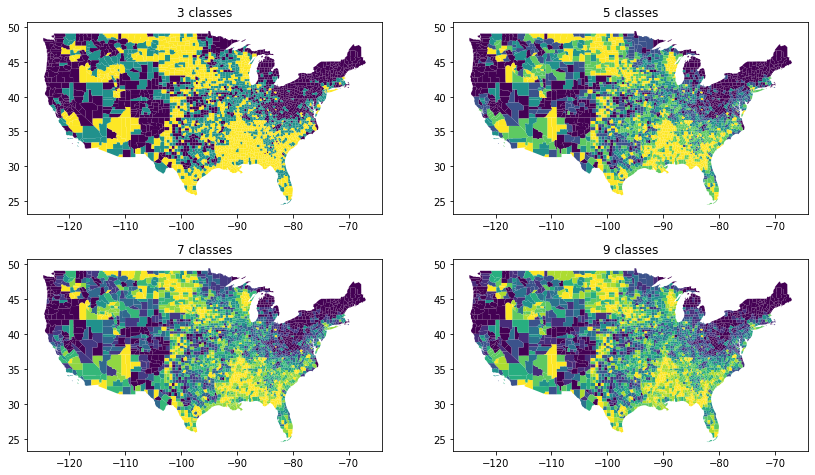

In [112]:
fig, axs = plt.subplots(2,2, figsize=(14, 8))
myaxs = [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]
for idx, val in enumerate([3,5,7,9]):
    cty_cont.plot(column='case_rate_100k', scheme='quantiles', k=val, ax=myaxs[idx], legend=False)
    myaxs[idx].set_title(str(val) + " classes")
plt.show()

### Mean SD

In [89]:
msd = mapclassify.StdMean(cty_cont['case_rate_100k'])
msd

StdMean                     

      Interval         Count
----------------------------
(    -inf,  -713.98] |     0
( -713.98,   946.20] |   378
(  946.20,  4266.54] |  2326
( 4266.54,  5926.71] |   290
( 5926.71, 17705.77] |   114

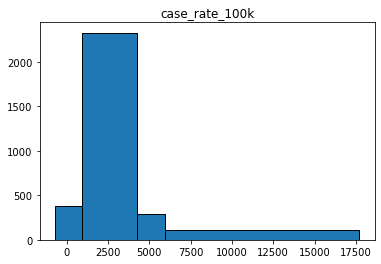

In [93]:
msdbins = msd.bins.tolist()
cty_cont.hist('case_rate_100k',
              bins=msdbins,
              edgecolor='black',
              grid=False)
plt.show()

<AxesSubplot:>

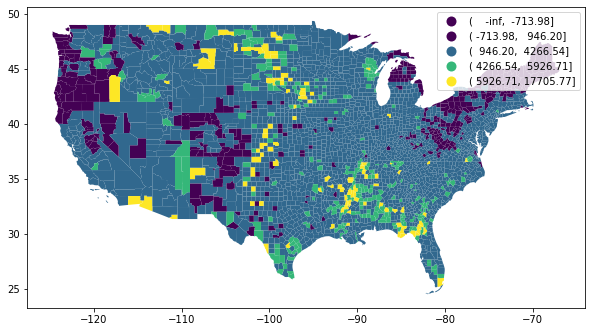

In [94]:
fig, ax = plt.subplots(1, figsize=(10, 8))
cty_cont.plot(column='case_rate_100k', scheme='StdMean', ax=ax, legend=True)

mb5 = mapclassify.MaximumBreaks(mx['PCGDP1940'], k=5)
mb5

### Fisher Jenks

In [83]:
import numpy as np
np.random.seed(12345)
fj5 = mapclassify.FisherJenks(cty_cont['case_rate_100k'])
fj5

FisherJenks                 

      Interval         Count
----------------------------
[    0.00,  1654.37] |   939
( 1654.37,  3014.26] |  1145
( 3014.26,  4778.78] |   748
( 4778.78,  8742.93] |   257
( 8742.93, 17705.77] |    19

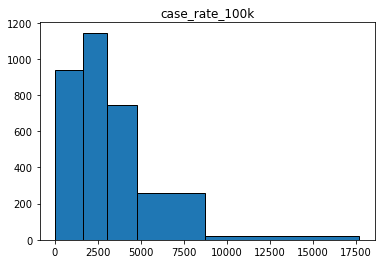

In [84]:
fj5bins = [0] + fj5.bins.tolist()
cty_cont.hist('case_rate_100k',
              bins=fj5bins,
              edgecolor='black',
              grid=False)
plt.show()

<AxesSubplot:>

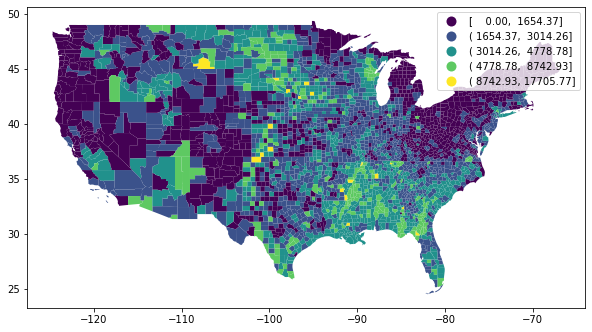

In [86]:
fig, ax = plt.subplots(1, figsize=(10, 8))
cty_cont.plot(column='case_rate_100k', scheme='fisherjenks', ax=ax, legend=True)

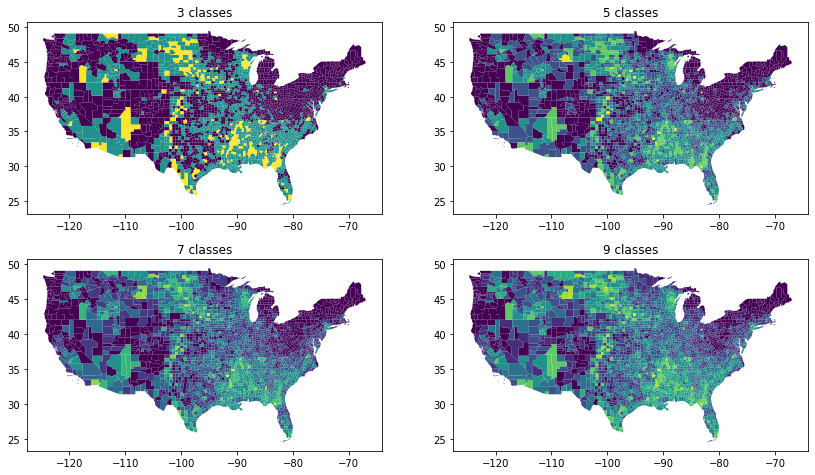

In [113]:
fig, axs = plt.subplots(2,2, figsize=(14, 8))
myaxs = [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]
for idx, val in enumerate([3,5,7,9]):
    cty_cont.plot(column='case_rate_100k', scheme='fisherjenks', k=val, ax=myaxs[idx], legend=False)
    myaxs[idx].set_title(str(val) + " classes")
plt.show()

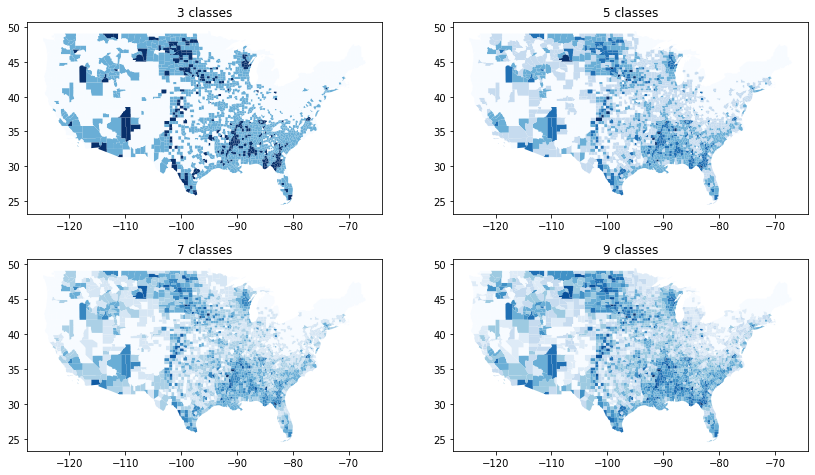

In [118]:
fig, axs = plt.subplots(2,2, figsize=(14, 8))
myaxs = [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]
for idx, val in enumerate([3,5,7,9]):
    cty_cont.plot(column='case_rate_100k', scheme='fisherjenks', k=val, ax=myaxs[idx], legend=False, cmap="Blues")
    myaxs[idx].set_title(str(val) + " classes")
plt.show()